# Netflix Content Analysis

This notebook explores how Netflix’s content library has changed over the years.
The main goal is to see whether Movies have increased faster than the TV Shows.

We will use EDA, simple cleaning, and a trend comparison based on yearly counts.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Movie vs TV Show Count
How many Movies and TV Shows are there?

In [8]:
type_counts = df["type"].value_counts()
type_counts


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

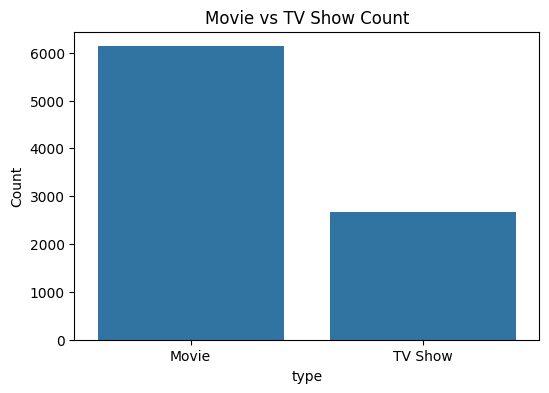

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Movie vs TV Show Count")
plt.ylabel("Count")
plt.show()


## Release Year Distribution
Basic distribution of release years.


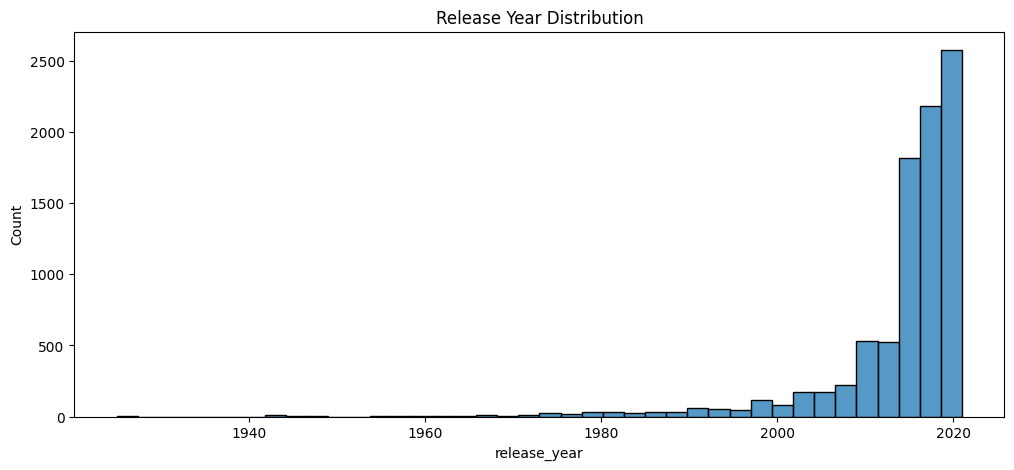

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df["release_year"], bins=40, kde=False)
plt.title("Release Year Distribution")
plt.show()


## Yearly Counts of Movies and TV Shows
This section is used for our hypothesis.


In [11]:
yearly = df.groupby(["release_year","type"]).size().reset_index(name="count")
yearly.head()


,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


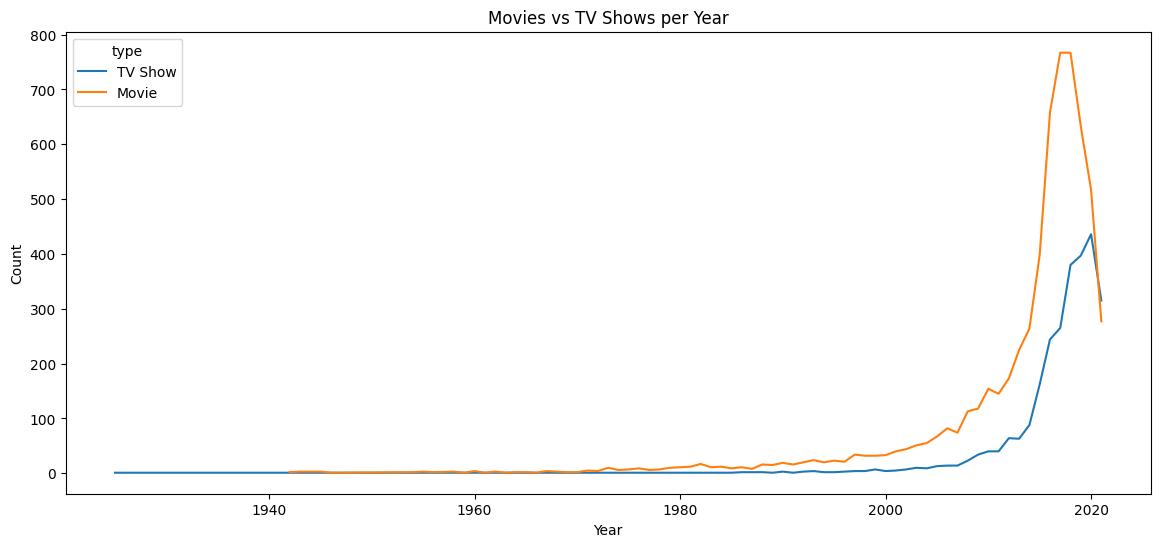

In [12]:
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly, x="release_year", y="count", hue="type")
plt.title("Movies vs TV Shows per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

## Ratio of TV Shows Over Time
If TV Shows increase faster, this ratio will rise.


In [13]:
pivot = yearly.pivot(index="release_year", columns="type", values="count").fillna(0) ## For this part ChatGPT is used couldn't find out how to calculate the ratio
pivot["ratio_tv"] = pivot["TV Show"] / (pivot["Movie"] + 1)
pivot.head()


type,Movie,TV Show,ratio_tv
release_year,,,
1925,0.0,1.0,1.00
1942,2.0,0.0,0.00
1943,3.0,0.0,0.00
1944,3.0,0.0,0.00
1945,3.0,1.0,0.25


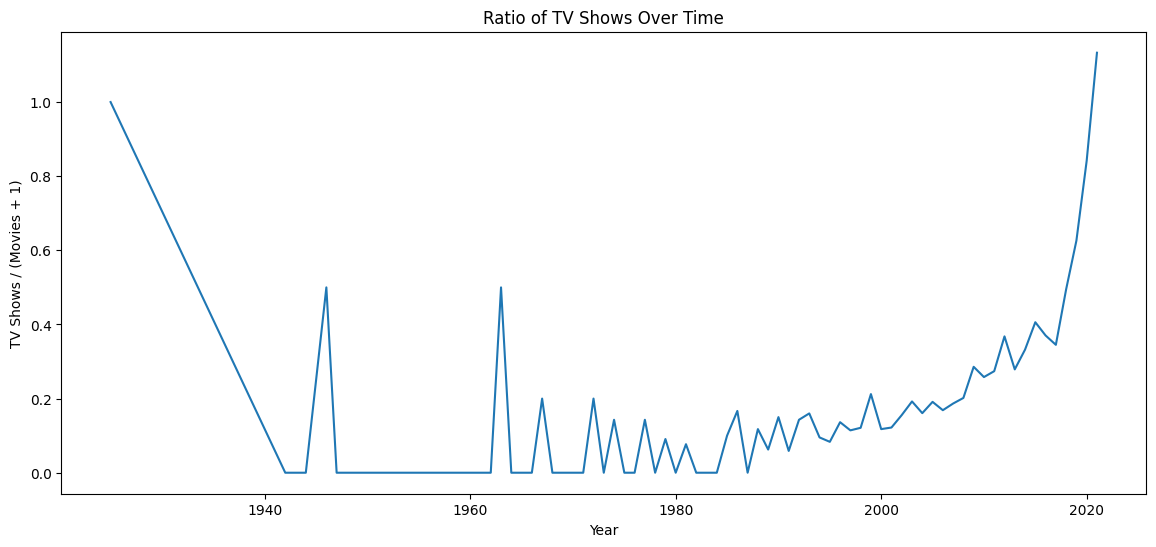

In [14]:
plt.figure(figsize=(14,6))
plt.plot(pivot.index, pivot["ratio_tv"])
plt.title("Ratio of TV Shows Over Time")
plt.xlabel("Year")
plt.ylabel("TV Shows / (Movies + 1)")
plt.show()


# Hypothesis Test

### H₀:
There is no meaningful trend indicating that Movies are increasing faster than the TV Shows.

### H₁:
Movies increase faster over time compared to TV Shows.


In [16]:
years = pivot.index.values
tv_counts = pivot["TV Show"].values
movie_counts = pivot["Movie"].values

tv_slope = np.polyfit(years, tv_counts, 1)[0]
movie_slope = np.polyfit(years, movie_counts, 1)[0]

print(movie_slope, tv_slope)

if movie_slope>tv_slope:
    print("H₁ is correct, reject null hypothesis.")
else:
    print("H₀ is correct.")


4.626349478227641 2.257433241063973
H₁ is correct, reject null hypothesis.


## Interpretation

If the slope for Movies is larger than the slope for TV Shows,
this supports the alternative hypothesis (H₁), meaning Movies
increase faster over time.

The slope values shown above allow us to compare both trends.


In [20]:
contingency = yearly.pivot(index="release_year", columns="type", values="count").fillna(0) # This part is taken from ChatGPT in order to make Chai Square Distribution
cont = contingency.values
row_totals = cont.sum(axis=1)
col_totals = cont.sum(axis=0)
total = cont.sum()

expected = np.outer(row_totals, col_totals) / total

chi2_manual = ((cont - expected) ** 2 / expected).sum()

print("X^2 value is",chi2_manual)






X^2 value is 541.611218744739


## Interpretation

Looked from above, it can be seen that X^2 value is too high. If looked from Chai Square Distrubiton Table, p<0.05, therefore reject null hypothesis.

# Conclusion

Based on the yearly trend analysis, Movies have increased at a faster rate than TV Shows in the Netflix dataset.  
The slope for Movies is higher than the slope for TV Shows, meaning Movie counts grow more rapidly over time.

As a result, we reject the null hypothesis (H₀).  
There is enough evidence supporting the idea that Movies increase faster than TV Shows on Netflix.

The alternative hypothesis (H₁) is supported by the data.
